------------------------------------------------------------------------------------------------------------
Migration probability = 0
Number of simulations:  458
Pi median Ratio:  0.9904621905056274
Panmictic Teta = 4*Ne*mu =  2.4999999999999998e-05
Mean Pi Autosome:  1.963018183406113e-05
------------------------------------------------------------------------------------------------------------
Migration probability = 0.05
Number of simulations:  434
Pi median Ratio:  0.8751802865568936
Panmictic Teta = 4*Ne*mu =  2.4999999999999998e-05
Mean Pi Autosome:  1.1303317050691246e-05
------------------------------------------------------------------------------------------------------------
Migration probability = 0.1
Number of simulations:  476
Pi median Ratio:  0.8626513245408371
Panmictic Teta = 4*Ne*mu =  2.4999999999999998e-05
Mean Pi Autosome:  1.128837756302521e-05
------------------------------------------------------------------------------------------------------------
Migration

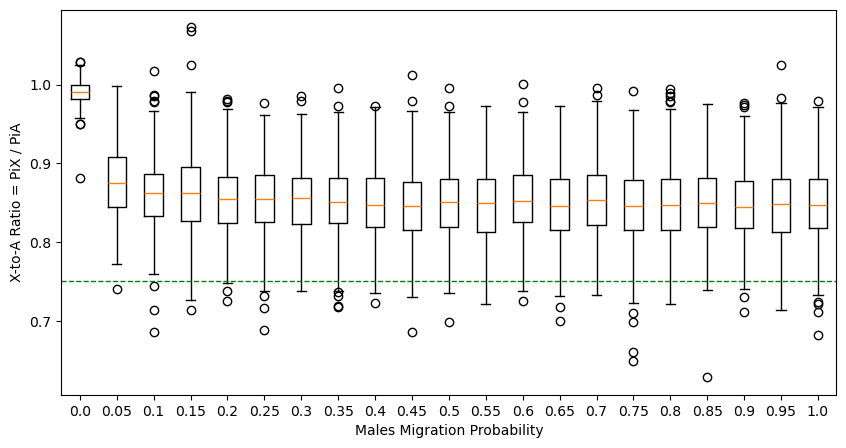

------------------------------------------------------------------------------------------------------------
Regression with proba=0 : a = -0.05229488292933637    b = 0.8850599430187008
Regression without proba=0 : a = -0.01900996267030645    b = 0.8623152475083637


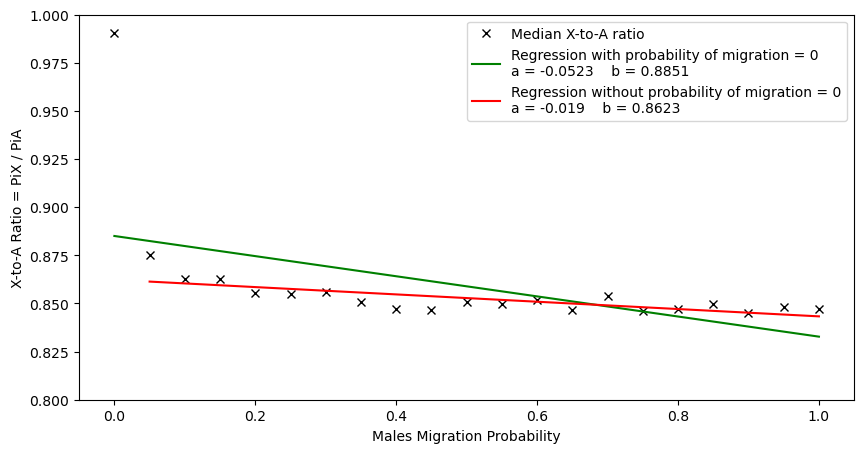

In [6]:
# Wright Fisher model
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/PI_Migration/"
expected_ratio = 0.75
LPro = [0]+[k/20 for k in range(1,20)]+[1]
Pi = [0 for k in range(21)]
Pi_M = []
compteur = 0
PIA = [0 for k in range(21)]
for ProbMig in LPro:
    Pi_ratio = []
    PiA = []
    for NUM in range(1,501):
        File = FOLDER+"Pi_Prob_Mig "+str(ProbMig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 0:
                Pi_ratio.append(float(Values[1])/float(Values[0]))
                PiA.append(float(Values[0]))
            Text.close()
    Pi[compteur] = Pi_ratio       
    PIA [compteur] = PiA
    Pi_median = np.median(Pi_ratio)
    Pi_M.append(Pi_median)
    PiA_mean = np.mean(PiA)
    print("------------------------------------------------------------------------------------------------------------")
    print("Migration probability = "+str(ProbMig))
    print("Number of simulations: ",len(Pi_ratio))
    print("Pi median Ratio: ",Pi_median)
    print("Panmictic Teta = 4*Ne*mu = ", 4*500*1.25e-8)
    print("Mean Pi Autosome: ",PiA_mean)
    compteur += 1

Values = [Pi[k] for k in range(21)]  
Labels = [str(k/20) for k in range(21)]

LPro = np.array(LPro)
# Regression with the proba of migration = 0
a_w0, b_w0 = np.polyfit(LPro, Pi_M, 1)
Reg_w0 = a_w0 * LPro + b_w0
# Regression without the 0
a_nw0, b_nw0 = np.polyfit(LPro[1:22],Pi_M[1:22], 1)
Reg_nw0 = a_nw0 * LPro[1:22] + b_nw0

a_nw0_h, b_nw0_h = np.polyfit(LPro[1:12],Pi_M[1:12], 1)
Reg_nw0_h = a_nw0_h * LPro[1:22] + b_nw0_h

print("------------------------------------------------------------------------------------------------------------")
fig1, ax1 = mp.subplots(figsize=(10, 5))
ax1.boxplot(Values,tick_labels=Labels)
ax1.set_xlabel("Males Migration Probability")
ax1.set_ylabel("X-to-A Ratio = PiX / PiA")
ax1.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='Expected Ratio')
#for k in range(1,22):
#    ax1.plot(k, expected_ratio, marker='D', color='green', markersize=5, label='Expected Ratio')
mp.show()

print("------------------------------------------------------------------------------------------------------------")
print("Regression with proba=0 : a = "+str(a_w0)+"    b = "+str(b_w0) )
print("Regression without proba=0 : a = "+str(a_nw0)+"    b = "+str(b_nw0) )

fig2, ax2 = mp.subplots(figsize=(10, 5))
ax2.plot(LPro,Pi_M,"x",color='black',markersize=6,label="Median X-to-A ratio") 
ax2.plot(LPro,Reg_w0,color = "g",label="Regression with probability of migration = 0\na = "+str(round(a_w0,4))+"    b = "+str(round(b_w0,4))) 
ax2.plot(LPro[1:22],Reg_nw0,color = "r",label="Regression without probability of migration = 0\na = "+str(round(a_nw0,4))+"    b = "+str(round(b_nw0,4)))
#ax2.plot(LPro[1:22],Reg_nw0_h,color = "purple",label="Regression between 0.1 and 0.5 probability of migration\na = "+str(round(a_nw0_h,4))+"    b = "+str(round(b_nw0_h,4)))
ax2.set_ylim([0.8, 1])
ax2.set_xlabel("Males Migration Probability")
ax2.set_ylabel("X-to-A Ratio = PiX / PiA")
ax2.legend()
mp.show()



**Analyse :**
- When looking to the probability of males migration = 0, we observe a *X-to-A ratio* near 1 (and not 0.75 with a panmectic hypothesis). The subdivision of the populations increase the *X-to-A ratio*.
- When adding migration, the *X-to-A ratio* decreases.
- The more important the migration is the more the *X-to-a ratio* decrease. But the gradient is very low (a = -0.019), almost null.

Migration has an influence on the *X-to-A ratio* by its existence, less by its variation.

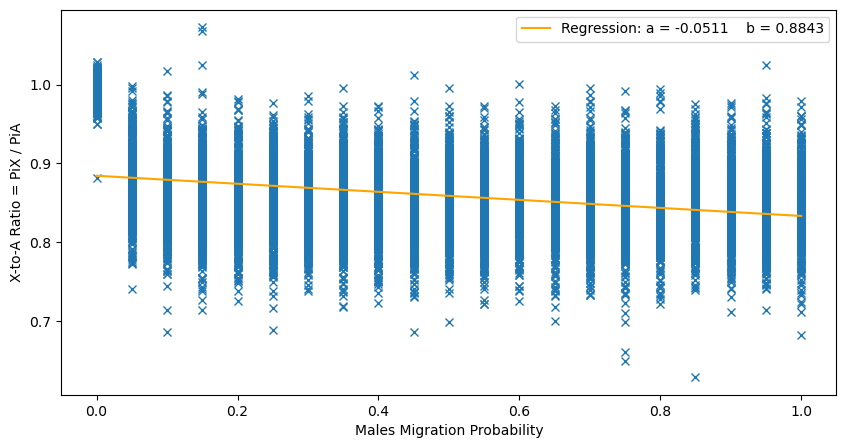

In [26]:
# Wright Fisher model
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/PI_Migration/"
expected_ratio = 0.75
LPro = [0]+[k/20 for k in range(1,20)]+[1]

LPi = []
Lproba = []
for ProbMig in LPro:
    for NUM in range(1,501):
        File = FOLDER+"Pi_Prob_Mig "+str(ProbMig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 0:
                LPi.append(float(Values[1])/float(Values[0]))
                Lproba.append(ProbMig)
            Text.close()

Lproba = np.array(Lproba)
a, b = np.polyfit(Lproba,LPi, 1)
Reg = a * Lproba + b

fig2, ax2 = mp.subplots(figsize=(10, 5))
ax2.plot(Lproba,LPi,"x",linestyle='None') 
ax2.plot(Lproba,Reg,color = "orange",label="Regression: a = "+str(round(a,4))+"    b = "+str(round(b,4))) 
ax2.set_xlabel("Males Migration Probability")
ax2.set_ylabel("X-to-A Ratio = PiX / PiA")
ax2.legend()
mp.show()

